# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Solution to Assignment 6 posted on JupyterHub and Canvas
 - Phase 1 of Design Project due 12/5
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)
 - Phase 2 will be assigned 11/29
     - Final submission due 12/19

## Week 8

 - Art of Electronics (AoE) Chapter 6
 - Microelectronics (Sedra and Smith) Chapter 14

## Overview

 - Last time...
     - BJT noise model
     - MOSFET noise model
     - Opamp noise model
     - Analyzing noise in opamp circuits
     - Minimizing noise
 - Today...
     - Noise filtering
     - Butterworth, Chebyshev, and Bessel filters
     - Sallen–Key filter architecture

## Python packages/modules

In [7]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

In [8]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 8 - Analog Filters

## First-order lowpass filter

<center><img src="img/first_order_lowpass.png" width=600 /></center>

\begin{align}
G(s) = \dfrac{V_{out}}{V_{in}} &= -\dfrac{R_2 || Z_C}{R_1}\\
\\
&= -\dfrac{R_2}{R_1}\cdot \dfrac{1}{1+sC_2R_1}
\end{align}

$$ f_{enb} = \dfrac{\pi}{2}f_{3dB} = \dfrac{1}{4R_1C_1} \approx 1.57 \cdot f_{3dB} $$ 

 - We can define the signal bandwidth $f_{sbw}$ as that which limits attenuation to a certain spec (e.g. 1%)
 - The signal bandwidth in this case is
 
$$ \dfrac{1}{\sqrt{1+(2\pi \cdot f_{sbw})^2/(2\pi\cdot f_{3dB})^2}}= 0.99 \rightarrow \boxed{f_{sbw} = 0.14\cdot f_{3dB}} $$
 
 
 - The ratio of noise bandwidth to signal bandwidth for a first-order filter (1% attenuation) is therefore
 
$$ \dfrac{f_{enb}}{f_{sbw}} =  11.2 $$
 
 - For a given $rms$ noise target, this may require an unrealistically low target for noise density for our front-end amplifier

## Filter cascading

 - If we cascade multiple first-order filters, can we do better?
 - The transfer function magnitude in this case is second order:
 
$$ \left|\dfrac{V_{out}}{V_{in}}(f)\right| = \left(\dfrac{1}{\sqrt{1+(2\pi \cdot f)/(2\pi \cdot f_0)}} \right)^2 $$

 - where $f_0 = \dfrac{1}{2\pi RC} $
 - Although the noise bandwidth is reduced relative to a first-order filter, increased attenuation lowers the signal bandwidth as well, offering only a slight improvement
 - To improve upon this, we need less attenuation in the "pass band" and steeper rolloff

<center><img src="img/filter_cascade.png" width=800 /></center> 

$$ f_{enb} = \dfrac{\pi}{4}\cdot f_{0} $$

$$ \dfrac{1}{1+(2\pi \cdot f_{sbw})^2/(2\pi\cdot f_{0})^2}= 0.99 $$


$$ \rightarrow f_{sbw} = 0.1\cdot f_{0} $$

$$ \dfrac{f_{enb}}{f_{sbw}} \approx 8 $$

## First-order frequency response

 - The dynamic behavior of a first-order filter is fully described by a single parameter, $\omega_0$:
 
$$ H(j\omega) = \dfrac{\omega_0}{j\omega + \omega_0} $$

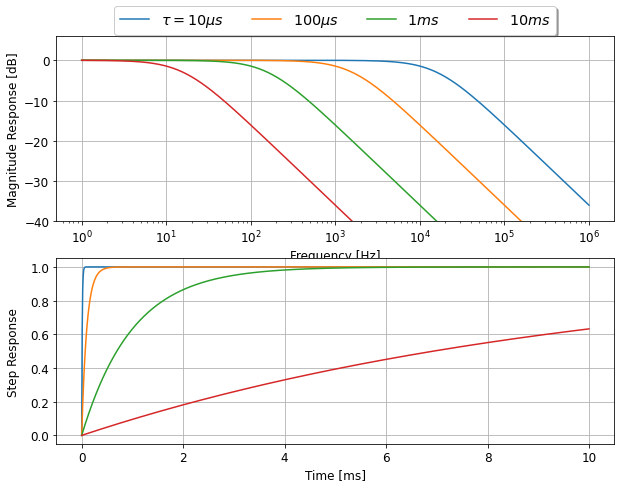

In [10]:
""" RC filter magnitude and step responses """
RC_mag = []
RC_step = []
tau = np.logspace(-5,-2, num = 4)
f = np.logspace(0, 6, num = 1000)
w = 2*np.pi*f
tin = np.linspace(0,1e-2,1000) 

for t in tau: 
    RC_mag.append(1/np.sqrt(1+(w*t)**2))
    RC_step.append(1-np.exp(-tin/t))
    
# Plot the frequency response
fig, axs = plt.subplots(2, figsize=(10.0, 7.5))
for mag in RC_mag:
    axs[0].semilogx(f, 20*np.log10(mag))

axs[0].legend( [r'$\tau = 10\mu s$', r'$100\mu s$', r'$1 ms$', r'$10 ms$'],loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.2))
axs[0].set_ylim(-40, 6)
axs[0].grid()
axs[0].set_ylabel('Magnitude Response [dB]')
axs[0].set_xlabel('Frequency [Hz]')
#axs[0].set_title('RC Lowpass Filter Magnitude and Step Responses')

for trans in RC_step:
    axs[1].plot(1e3*tin, trans)   
axs[1].set_xlabel('Time [ms]')    
axs[1].set_ylabel('Step Response')
axs[1].grid()

fig.align_ylabels(axs[:])
#plt.show()
